# Numerical Simulation Laboratory

# Numerical exercise 2 

## Exercise 02.1
Calcolo del seguente integrale utilizzando i metodi Monte Carlo di *importance* e *uniform sampling*:
    $$ I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1 \,.$$

### <font color='blue'> Uniform sampling</font>
Determino il valore dell'integrale $I$ utilizzando un metodo Monte Carlo basato su una distribuzione uniforme di numeri casuali. In particolare, generando valori casuali uniformi nell'intervallo di integrazione $[0,1]$ posso stimare l'integrale come:
    $$ I = \frac{1}{M} \sum_{i=1}^{M} \frac{\pi}{2}\cos ( \pi x_i/2 )    \,.$$
Il grafico sotto riportato mostra la stima dell'integrale ottenuta utilizzando il metodo delle **medie a blocchi** per determinare valori medi e incertezze statistiche in funzione del numero di valori casuali utilizzati nel calcolo. In particolare ho suddiviso la simulazione in $100$ blocchi contenenti $10^4$ valori ciascuno.

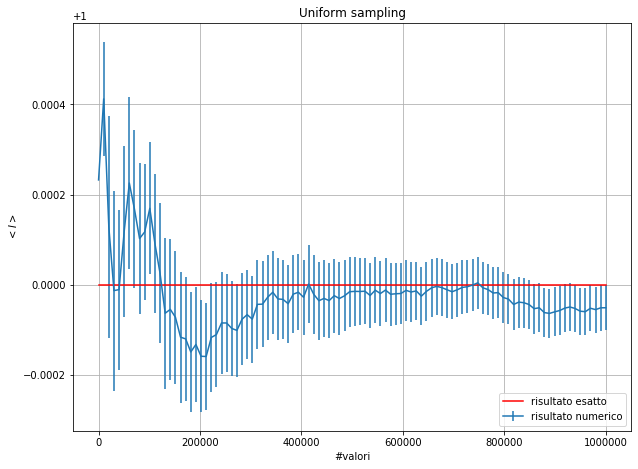

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7.5))
Iunif, unierr= np.loadtxt('./Files/uniform.out', delimiter = '  ', unpack = 'True')

x=np.linspace(0,10**6,100)
y = 1*x**0

plt.errorbar(x, Iunif, yerr=unierr, label='risultato numerico')  #grafico dell'integrale con barre di errore
plt.plot(x, y, color='red', label='risultato esatto')  #grafico del risultato esatto
plt.title('Uniform sampling')
plt.xlabel('#valori')
plt.ylabel('$<I>$')
plt.legend(loc=4)
plt.grid(True)

### <font color='blue'> Importance sampling</font>
Determino il valore dell'integrale $I$ utilizzando un metodo Monte Carlo basato su una distribuzione non uniforme di numeri casuali in modo da ridurre l'incertezza a parità di numeri casuali utilizzati. In particolare ho scelto di utilizzare una probabilità lineare che approssima meglio l'andamento della funzione integranda nell'intervallo di integrazione rispetto alla probabilità uniforme:
    $$ p(x) = \frac{\pi}{2}(1-x)  \,.$$
Per il calcolo Monte Carlo dell'integrale è necessario normalizzare sull'intervallo di integrazione $[0,1]$ la distribuzione di probabilità prescelta, ottenendo così la probabilità normalizzata:
    $$ P(x) = 2(1-x) \,.$$
Come è possibile notare dal grafico sottostante, la distribuzione prescelta per il calcolo tramite *importance sampling* approssima meglio l'andamento della funzione integranda rispetto alla distribuzione uniforme.
<img src="./Pictures/functions.svg"  width="600">
Utilizzando il metodo dell'**inversa della funzione cumulativa** posso generare valori casuali distribuiti secondo la probabilità $P(x)$ a partire da una variabile casuale $y$ uniforme nell'intervallo $[0,1]$ attraverso la seguente equazione: 
    $$ x = 1 - \sqrt{1-y}  \,,$$
e applicando il metodo Monte Carlo *importance sampling*, posso stimare il valore dell'integrale tramite la seguente equazione
$$ I = \frac{1}{M} \sum_{i=1}^{M} \frac{f(x_i)}{p(x_i)}   \,.$$
Analogamente al caso precedente ottengo il valore di $I$ e le relative incertezze utilizzando il **metodo delle medie a blocchi** generando $10^6$ valori casuali e suddividendoli in $100$ blocchi. Il grafico mostra la stima del valore dell'integrale in funzione del numero di valori casuali utilizzati per effettuare il calcolo. Come è possibile osservare in particolare dal secondo grafico qui riportato, a parità di valori utilizzati nel calcolo, le incertezze ottenute tramite *importance sampling* sono più piccole rispetto a quelle ottenute tramite *uniform sampling*.

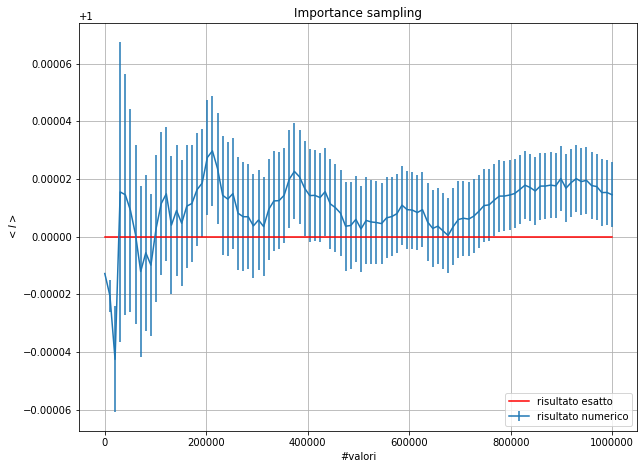

In [2]:
plt.figure(figsize=(10, 7.5))
Iimportance, imperr= np.loadtxt('./Files/importance.out', delimiter = '  ', unpack = 'True')

x=np.linspace(0,10**6,100)
y = 1*x**0

plt.errorbar(x, Iimportance, yerr=imperr, label='risultato numerico')  #grafico dell'integrale con barre di errore
plt.plot(x, y, color='red', label='risultato esatto')  #grafico del risultato esatto
plt.title('Importance sampling')
plt.xlabel('#valori')
plt.ylabel('$<I>$')
plt.legend(loc=4)
plt.grid(True)

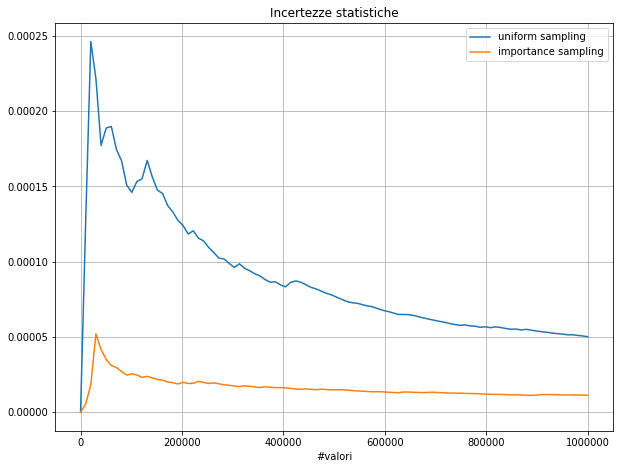

In [3]:
plt.figure(figsize=(10, 7.5))

x=np.linspace(0,10**6,100)
plt.plot(x, unierr, label='uniform sampling')  #incrtezze uniform sampling
plt.plot(x, imperr, label='importance sampling')  #incertezze importance sampling

plt.title('Incertezze statistiche')
plt.xlabel('#valori')
plt.legend()
plt.grid(True)

## Exercise 02.2
Simulazione di un random walk in un reticolo cubico e nello spazio continuo stimando il valor medio del quadrato della posizione $\langle r^2 \rangle_N$ in funzione del numero $N$ di passi.
### <font color='blue'> Reticolo cubico</font>
Considero un reticolo cubico di lato $a=1$ e simulo il random walk con spostamenti successivi sulle 6 possibili posizioni reticolari adiacenti. Poichè la probabilità di avere uno spostamento in una delle tre direzioni principali *x,y,z* è uniforme, genero un valore casuale uniforme nell'intervallo $(0,3)$ e ne considero la parte intera. Assoccio il risultato dell'estrazione casuale allo spostamento lungo una delle tre direzioni possibili:
- **0** spostamento in direzione **x**
- **1** spostamento in direzione **y**
- **2** spostamento in direzione **z**

Genero un secondo valore casuale $r$ uniforme nell'intervallo $(0,1)$ in modo da determinare uno spostamento nel verso positivo o negativo lungo la direzione prescelta:
- $r<0.5$ spostamento nel verso **positivo**
- $r>0.5$ spostamento nel verso **negativo**

Sviluppo la simulazione effettuando $10^4$ random walk differenti e in ciascuno di essi simulo $100$ step successivi all'interno del reticolo cubico. Utilizzando il metodo delle **medie a blocchi** determino il valore medio del modulo quadro della posizione $\langle r^2 \rangle_N$ e le relative incertezze statistiche in funzione del numero $N$ di passi effettuati.

Il grafico sottostante riporta i risultati ottenuti con tale procedimento: è possibile osservare un ottimo accordo con l'andamento atteso $f(N)=k\sqrt{N}$, nonstante le incertezze siano molto piccole a causa del numero elevato di random walk simulati. In particolare il valore  ottenuto dal *fit* dei dati $k=1.0052$ è in ottimo accordo con il valore atteso $k=1$ mostrando che il random walk ha un comportamento diffusivo.

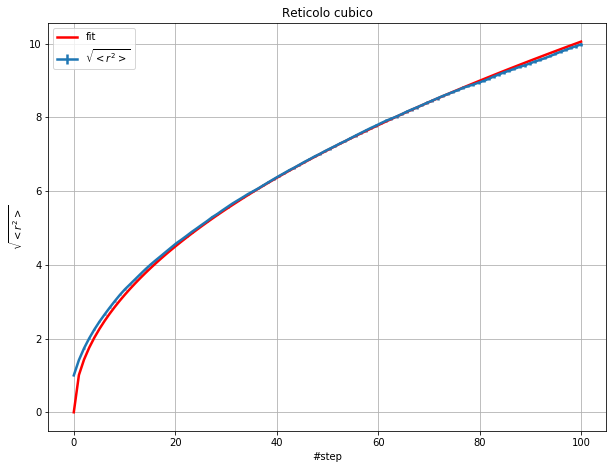

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.figure(figsize=(10, 7.5))
rw, err= np.loadtxt('./Files/RWlattice.out', delimiter = '  ', unpack = 'True')

x=np.linspace(0,100,100)

#funzione con cui fittare l'andamento
def func(x, k):
    return k*(x**0.5)

popt, pcov = curve_fit(func, x, rw)  #fit del parametro k per il random walk nel reticolo
#print(popt)

plt.errorbar(x, rw, err, label='$\sqrt{<r^2>}$', linewidth=2.5)  #varianza
plt.plot(x, func(x, *popt), color='red', label='fit', linewidth=2.5)  #fit della funzione 

plt.title("Reticolo cubico")
plt.xlabel('#step')
plt.ylabel('$\sqrt{<r^2>}$')
plt.grid(True)
plt.legend()
plt.show()

### <font color='blue'> Spazio continuo</font>
Simulo un random walk nello spazio continuo in modo tale che ad ogni step sia possibile effettuare uno spostamento di lunghezza $a=1$ in una qualsiasi direzione dello spazio: è quindi necessario campionare in modo uniforme l'angolo solido attraverso la generazione dei valori casuali $\theta \in [0,\pi]$ e $\phi \in [0,2\pi]$ corrispondenti rispettivamente agli angoli **polare** e **azimutale** delle coordinate sferiche.

Nella sezione successiva riporto il procedimento seguito per determinare in modo corretto $\theta$ e $\phi$ in modo da <font color=red>**campionare uniformemente l'angolo solido**</font>, mentre nel seguito mi concentro sulla descrizione della simulazione del random walk.
Sfruttando le coordinate sferiche e calcolando gli angoli polare e azimutale che indicano la direzione dello spostamento, posso determinare le coordinate cartesiane della posizione $n$-esima del random walk effetuando uno step di lunghezza $a$:
- $x_{n}= x_{n-1} + a \sin(\theta) \cos(\phi)$
- $y_{n}= y_{n-1} + a \sin(\theta) \sin(\phi)$
- $z_{n}= z_{n-1} + a \cos(\theta) $

dove $x_n, y_n, z_n$ sono le coordinate cartesiane della posizione dell'oggetto dopo $n$ passi.

Sviluppo la simulazione effettuando $10^4$ random walk differenti e in ciascuno di essi simulo $100$ step successivi all'interno del reticolo cubico. Utilizzando il metodo delle **medie a blocchi** determino il valore medio del modulo quadro della posizione $\langle r^2 \rangle_N$ e le relative incertezze statistiche in funzione del numero $N$ di passi effettuati.

Il grafico sottostante riporta i risultati ottenuti con tale procedimento: è possibile osservare un ottimo accordo con l'andamento atteso $f(N)=k\sqrt{N}$, nonstante le incertezze siano molto piccole a causa del numero elevato di random walk simulati. In particolare il valore  ottenuto dal *fit* dei dati $k=1.0055$ è in ottimo accordo con il valore atteso $k=1$ mostrando che il random walk ha un comportamento diffusivo.

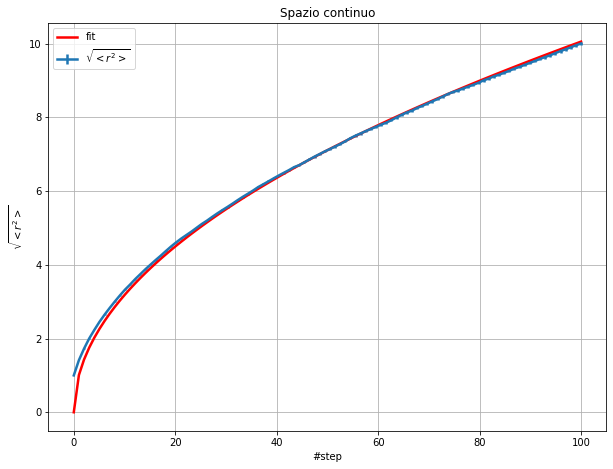

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.figure(figsize=(10, 7.5))
rw, err= np.loadtxt('./Files/RWcontinuum.out', delimiter = '  ', unpack = 'True')

x=np.linspace(0,100,100)

#funzione con cui fittare l'andamento
def func(x, k):
    return k*(x**0.5)

popt, pcov = curve_fit(func, x, rw)  #fit del parametro k per il random walk nel reticolo
#print(popt)

#grafico della varianza del rw e del fit
plt.errorbar(x, rw, err, label='$\sqrt{<r^2>}$', linewidth=2.5)  #varianza
plt.plot(x, func(x, *popt), color='red', label='fit', linewidth=2.5)  #fit della funzione 

plt.title("Spazio continuo")
plt.xlabel('#step')
plt.ylabel('$\sqrt{<r^2>}$')
plt.grid(True)
plt.legend()
plt.show()

### <font color='red'> Campionamento uniforme dell'angolo solido</font>

Per poter campionare in modo uniforme l'angolo solido $\Omega$ è necessario determinare le densità di probabilità con cui generare gli angoli $\theta$ e $\phi$. Normalizzando all'unità la probabilità totale sull'angolo solido e ricordando la relazione tra i differenziali $d\Omega = \sin(\theta)d\theta d\phi$ ottengo la seguente equazione
    $$ P(\Omega) d\Omega = \frac{1}{4\pi} d\Omega = P(\theta, \phi) d\theta d\phi \,,$$
da cui ricavo
    $$ P(\theta, \phi) = \frac{\sin(\theta)}{4\pi} \,.$$

Marginalizzando la distribuzione di probabilità congiunta ricavo le seguenti **distribuzioni di probabilità**:
    $$p(\theta) = \int_0^{2\pi} P(\theta, \phi) d\phi  = \frac{sin(\theta)}{2} \,,$$ 
    $$p(\phi) = \int_0^{\pi}P(\theta, \phi) d\theta = \frac{1}{2\pi} \,.$$

Applicando il metodo dell'**inversa della funzione cumulativa**, determino le distribuzioni cumulative relative alle densità di probabilità da campionare e invertendole posso ricavare le variabili stocastiche $\theta, \phi$ a partire dai valori casuali $x,y$ distribuiti uniformemente nell'intervallo $[0,1]$ tramite le seguenti relazioni:
$$ \theta = \arccos(2x-1) \quad \quad \phi = 2\pi y  \,.$$

I seguenti grafici mostrano la differenza tra un campionamento uniforme delle variabili $\theta, \phi$ nei rispettivi intervalli di esistenza ed un campionamento corretto dell'angolo solido eseguito utilizzando il procedimento spiegato. Come si può osservare nel primo caso si ha una forte concentrazione di punti intorno ai poli mentre nel secondo i punti sono distribuiti in modo uniforme su tutta la superficie della sfera.

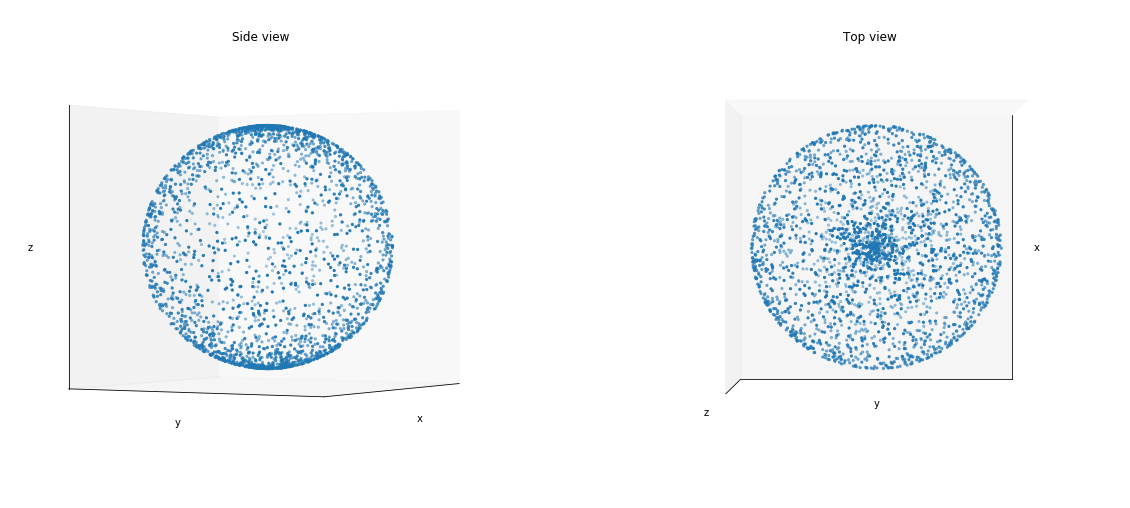

In [47]:
from mpl_toolkits.mplot3d import Axes3D

M=2500
fig = plt.figure(figsize=(20, 20))
#campionamento scorretto di theta e phi
theta=np.random.uniform(0.0, math.pi, M)
phi=np.random.uniform(0.0, 2*math.pi, M)
X=np.sin(theta)*np.cos(phi)
Y=np.sin(theta)*np.sin(phi)
Z=np.cos(theta)

ax = fig.add_subplot(2,2,1, projection='3d')
ax.scatter(X, Y, Z, marker='.')
ax.set_title("Side view")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(0, 30) #vista equatoriale
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
ax.axes.zaxis.set_ticks([])

ax = fig.add_subplot(2,2,2, projection='3d')
ax.scatter(X, Y, Z, marker='.')
ax.set_title("Top view")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(90, 0) #vista dall'alto
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
ax.axes.zaxis.set_ticks([])
plt.show()

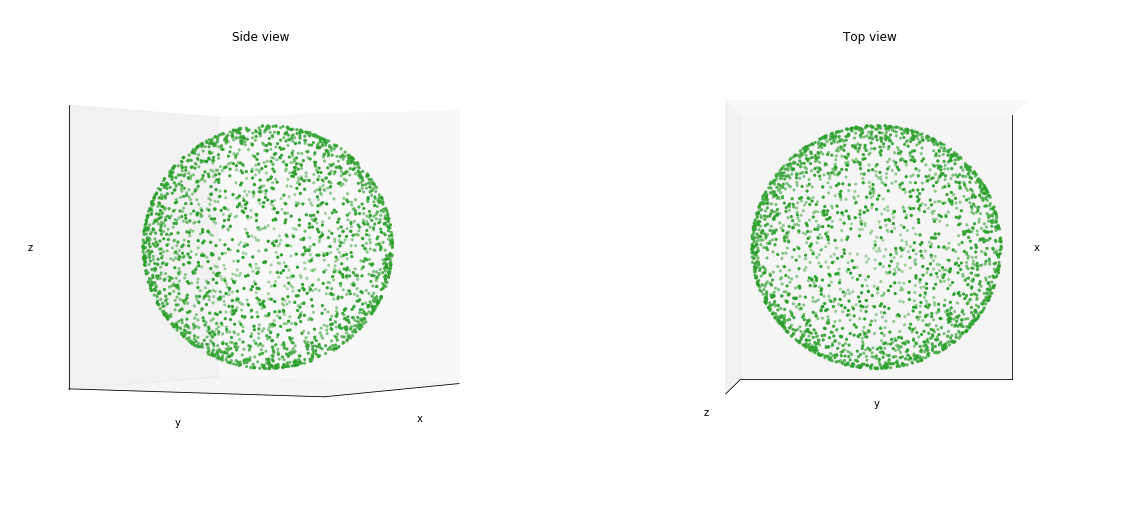

In [49]:
fig = plt.figure(figsize=(20, 20))
#campionamento uniforme dell'angolo solido
x=np.random.uniform(0.0, 1.0, M)
theta=np.arccos(2*x-1)
phi=np.random.uniform(0.0, 2*math.pi, M)
X=np.sin(theta)*np.cos(phi)
Y=np.sin(theta)*np.sin(phi)
Z=np.cos(theta)

ax = fig.add_subplot(2,2,3, projection='3d')
ax.scatter(X, Y, Z, c='tab:green', marker='.')
ax.set_title("Side view")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
ax.axes.zaxis.set_ticks([])
ax.view_init(0,30) #vista equatoriale

ax = fig.add_subplot(2,2,4, projection='3d')
ax.scatter(X, Y, Z, c='tab:green', marker='.')
ax.set_title("Top view")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
ax.axes.zaxis.set_ticks([])
ax.view_init(90, 0) #vista dall'alto
plt.show()